# Introduction

The main objective of this project is to build a machine learning model that can predict the price of any house with the help of information provided to it. Therefore, we need to build a regression model. To do this we need to follow the following steps:

    1. Data Cleaning
        - Missing value handling
        - Feature Engineering
    
    2. Data Visualization
    
    3. Data Preprocessing
        - Encoding
        - Scaling
        - Splitting the data
        
    4. Building Models
        - Linear Regression
        - Decision Tree
        - Random Forest
        
    5. Model Evaluation  

# Importing the Liabraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the dataset 

In [3]:
df = pd.read_csv("House_price_India.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.shape

(29451, 12)

As we can see, the data is almost 30,000 rows and has 12 features

In [5]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

There are no missing values in the dataset

Lets have a look at the info and some statistical values of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


There are 3 non numeric features which we have to take care of before building the model.

# Data Cleaning 

Lets start with extracting the city from the address

In [8]:
df["ADDRESS"] = df["ADDRESS"].str.split(",").str[-1]
df["ADDRESS"]

0        Bangalore
1           Mysore
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29446         Agra
29447         Vapi
29448       Jaipur
29449      Chennai
29450       Jaipur
Name: ADDRESS, Length: 29451, dtype: object

We will now assign the cities based on their tiers. We can find out which city is which tier from https://en.wikipedia.org/wiki/Classification_of_Indian_cities 

In [9]:
def city_tier(city):
    if city in ["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]:
        return "tier_1"
    elif city in ["Agra", "Ajmer", "Aligarh", "Amravati", 'Amritsar', "Anand", "Asansol", "Aurangabad", "Bareilly",
                  "Belagavi", "Brahmapur", "Bhavnagar", "Bhiwandi", "Bhopal", "Bhubaneswar", "Bikaner", "Bilaspur",
                  "Bokaro Steel City", "Burdwan" , "Chandigarh", "Coimbatore", "Cuttack", "Dahod", "Dehradun", "Dombivli",
                  "Dhanbad", "Bhilai", "Durgapur", "Erode", "Faridabad", "Ghaziabad", "Gorakhpur", "Guntur", "Gurgaon",
                  "Guwahati", "Gwalior", 'Hamirpur', "Hubballi–Dharwad", "Indore", 'Jabalpur', "Jaipur", "Jalandhar",
                  "Jalgaon", "Jammu", "Jamshedpur", "Jhansi", "Jodhpur", "Kalaburagi", "Kakinada", "Kannur", "Kanpur",
                  "Karnal", "Kochi", "Kolhapur", "Kollam", "Kota", "Kozhikode", "Kurnool", "Ludhiana", "Lucknow"," Madurai",
                  "Malappuram", "Mathura", "Mangaluru", "Meerut", "Moradabad", "Mysuru", "Nagpur", 'Nanded', "Nadiad",
                  "Nashik", "Nellore", 'Noida', 'Patna', "Puducherry", "Purulia", "Prayagraj", 'Raipur', 'Rajkot',
                  "Rajamahendravaram", 'Ranchi', 'Rourkela', 'Ratlam', 'Saharanpur', 'Salem', 'Sangli', 'Shimla',
                  "Siliguri", "Solapur", 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur',
                  'Tiruchirappalli', 'Tirunelveli', 'Tiruvannamalai', 'Ujjain', 'Vijayapura', 'Vadodara', 'Varanasi',
                  'Vasai-Virar',' Vijayawada', 'Visakhapatnam', 'Vellore', "Warangal"]:
        return "tier_2"
    else:
        return "tier_3"
    
df["City_tier"] = df["ADDRESS"].apply(city_tier)

In [10]:
df["City_tier"]

0        tier_3
1        tier_3
2        tier_3
3        tier_2
4        tier_1
          ...  
29446    tier_2
29447    tier_3
29448    tier_2
29449    tier_1
29450    tier_2
Name: City_tier, Length: 29451, dtype: object

# Visualization 

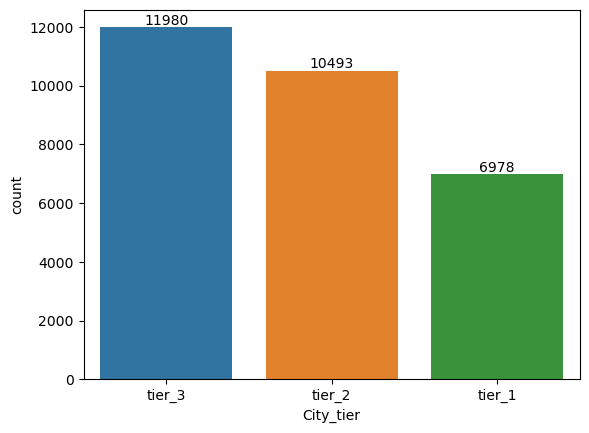

In [11]:
city_tier_cp = sns.countplot(df , x = "City_tier")

for bars in city_tier_cp.containers:
    city_tier_cp.bar_label(bars)

As we can see, most of the houses available in the dataset belong to tier 3 cities

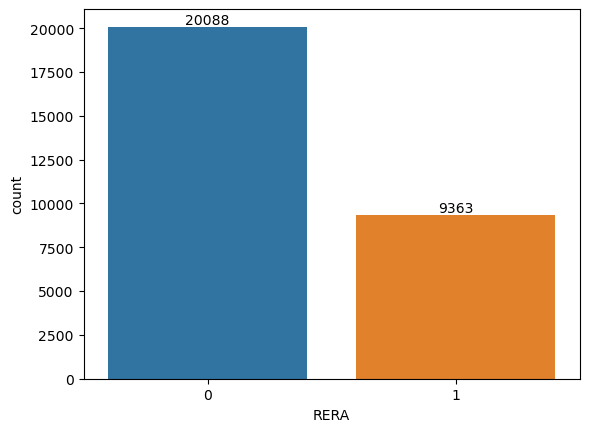

In [12]:
rera_cp = sns.countplot(df , x = "RERA")

for bars in rera_cp.containers:
    rera_cp.bar_label(bars)

We can see that most of the houses are not RERA Registered

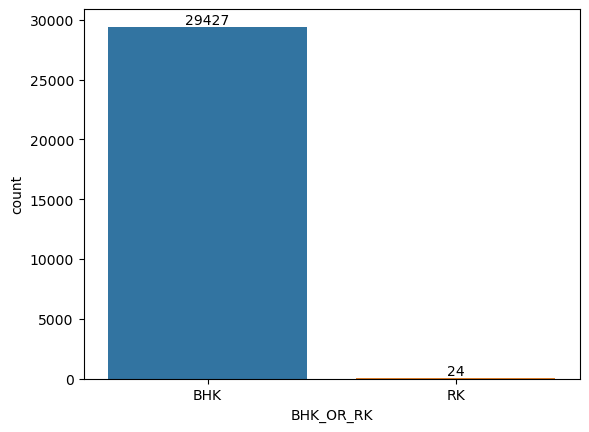

In [13]:
bhk_or_rk_cp = sns.countplot(df , x = "BHK_OR_RK")

for bars in bhk_or_rk_cp.containers:
    bhk_or_rk_cp.bar_label(bars)

The above graph makes it clear that most of the listings are of BHK type houses and only 24 RK are listed.

# Data Preprocessing

##  Encoding

In [14]:
# Encoding the city_tier feature

df.replace({"tier_1" : 0 , "tier_2" : 1 , "tier_3" : 2}, inplace=True)

In [15]:
# Since we no longer need the Address feature, we will drop it

df.drop("ADDRESS", axis=1, inplace=True)

In [16]:
# Encoding the BHK_OR_RK feature

df.replace({"RK" : 0 , "BHK" : 1}, inplace= True)

In [17]:
# One hot encoding the POSTED_BY feature

posted_by_df = pd.get_dummies(df["POSTED_BY"], prefix="PostedBy")
posted_by_df

,PostedBy_Builder,PostedBy_Dealer,PostedBy_Owner
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
29446,0,0,1
29447,0,0,1
29448,0,1,0
29449,0,0,1


In [18]:
df = pd.concat([df, posted_by_df], axis=1)

In [19]:
# Dropping the POSTED_BY column as we no longer need it

df.drop("POSTED_BY", axis=1, inplace=True)

Lets have a look at how the data looks like now

In [20]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_tier,PostedBy_Builder,PostedBy_Dealer,PostedBy_Owner
0,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0,2,0,0,1
1,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0,2,0,1,0
2,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0,2,0,0,1
3,0,1,2,1,929.921143,1,1,28.642300,77.344500,62.5,1,0,0,1
4,1,0,2,1,999.009247,0,1,22.592200,88.484911,60.5,0,0,1,0


## Scaling

In [21]:
mm_scaler = MinMaxScaler()
array = mm_scaler.fit_transform(df)
df = pd.DataFrame(array, columns=df.columns)
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City_tier,PostedBy_Builder,PostedBy_Dealer,PostedBy_Owner
0,0.0,0.0,0.052632,1.0,0.000005,1.0,1.0,0.519154,0.725671,0.001825,1.0,0.0,0.0,1.0
1,0.0,0.0,0.052632,1.0,0.000005,1.0,1.0,0.512032,0.722201,0.001692,1.0,0.0,1.0,0.0
2,0.0,0.0,0.052632,1.0,0.000004,1.0,1.0,0.517189,0.725796,0.001425,1.0,0.0,0.0,1.0
3,0.0,1.0,0.052632,1.0,0.000004,1.0,1.0,0.679690,0.724748,0.002075,0.5,0.0,0.0,1.0
4,1.0,0.0,0.052632,1.0,0.000004,0.0,1.0,0.617717,0.765300,0.002008,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0.0,0.0,0.105263,1.0,0.000010,1.0,1.0,0.664308,0.727292,0.001492,0.5,0.0,0.0,1.0
29447,0.0,0.0,0.052632,1.0,0.000003,1.0,1.0,0.795469,0.129623,0.000525,1.0,0.0,0.0,1.0
29448,0.0,0.0,0.052632,1.0,0.000004,1.0,1.0,0.662138,0.719228,0.000895,0.5,0.0,1.0,0.0
29449,0.0,0.0,0.052632,1.0,0.000004,1.0,1.0,0.518440,0.735244,0.002225,0.0,0.0,0.0,1.0


## Splitting the dataset 

In [22]:
x = df.drop("TARGET(PRICE_IN_LACS)", axis=1)
y = df["TARGET(PRICE_IN_LACS)"]

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=20)

In [24]:
xtrain

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City_tier,PostedBy_Builder,PostedBy_Dealer,PostedBy_Owner
3707,0.0,1.0,0.052632,1.0,0.000005,1.0,1.0,0.639208,0.728659,1.0,0.0,1.0,0.0
14799,0.0,0.0,0.105263,1.0,0.000008,1.0,1.0,0.677133,0.723347,0.5,0.0,1.0,0.0
28705,0.0,0.0,0.052632,1.0,0.000004,1.0,1.0,0.517909,0.725649,1.0,0.0,1.0,0.0
6531,0.0,0.0,0.105263,1.0,0.000005,1.0,1.0,0.519788,0.725891,1.0,0.0,1.0,0.0
6891,0.0,0.0,0.105263,1.0,0.000005,1.0,1.0,0.519274,0.725944,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,0.0,0.0,0.105263,1.0,0.000005,1.0,1.0,0.519154,0.725671,1.0,0.0,1.0,0.0
23775,0.0,0.0,0.105263,1.0,0.000006,1.0,1.0,0.677534,0.724773,0.5,0.0,1.0,0.0
4367,0.0,0.0,0.105263,1.0,0.000005,1.0,1.0,0.602792,0.731192,1.0,0.0,1.0,0.0
27098,0.0,0.0,0.052632,1.0,0.000005,1.0,1.0,0.545153,0.711833,1.0,0.0,1.0,0.0


In [25]:
xtest

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City_tier,PostedBy_Builder,PostedBy_Dealer,PostedBy_Owner
731,0.0,1.0,0.105263,1.0,0.000006,1.0,1.0,0.603149,0.708316,0.5,0.0,1.0,0.0
20184,0.0,1.0,0.052632,1.0,0.000005,1.0,1.0,0.582373,0.708363,1.0,0.0,1.0,0.0
8607,1.0,0.0,0.105263,1.0,0.000005,0.0,1.0,0.660042,0.764723,0.5,0.0,1.0,0.0
16825,1.0,1.0,0.052632,1.0,0.000004,0.0,1.0,0.582724,0.708760,0.0,0.0,1.0,0.0
3311,0.0,0.0,0.105263,1.0,0.000006,1.0,1.0,0.553654,0.736013,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1.0,1.0,0.052632,1.0,0.000003,0.0,0.0,0.580580,0.708328,0.0,1.0,0.0,0.0
16305,0.0,0.0,0.052632,1.0,0.000003,1.0,1.0,0.679041,0.725064,0.5,0.0,1.0,0.0
25033,0.0,0.0,0.000000,1.0,0.000004,1.0,1.0,0.614122,0.709664,0.5,0.0,0.0,1.0
22141,0.0,0.0,0.000000,1.0,0.000003,1.0,1.0,0.576674,0.711633,0.0,0.0,1.0,0.0


In [26]:
ytrain

3707     0.003325
14799    0.003658
28705    0.001992
6531     0.001625
6891     0.002025
           ...   
23452    0.002825
23775    0.001458
4367     0.007325
27098    0.004325
15715    0.001192
Name: TARGET(PRICE_IN_LACS), Length: 22088, dtype: float64

In [27]:
ytest

731      0.001692
20184    0.006992
8607     0.001308
16825    0.004325
3311     0.001772
           ...   
12027    0.002775
16305    0.001092
25033    0.001158
22141    0.001208
29347    0.000525
Name: TARGET(PRICE_IN_LACS), Length: 7363, dtype: float64

# Model Building

## 1. Linear Regression 

In [122]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

### Model Evaluation

In [123]:
# Testing Data Evaluation

ypredtest = lin_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtest) - 1) / (len(xtest) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.004808007234546486
Mean_squared_error:  0.00045508675751681517
R_squared:  0.18956803519894017
Adjusted_R2:  0.18813442306907036


In [124]:
# Training Data Evaluation

ypredtrain = lin_reg.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtrain) - 1) / (len(xtrain) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  118.85910663727857
Mean_squared_error:  34522.83299354268
R_squared:  -76374853.54681386
Adjusted_R2:  -76419832.84866711


The Linear Regression model negative R2_score as the model is very badly fitted for the data. This means that the data is not linear at all.

We can check the linearity by finding the correlation coefficient of all the columns

<Axes: >

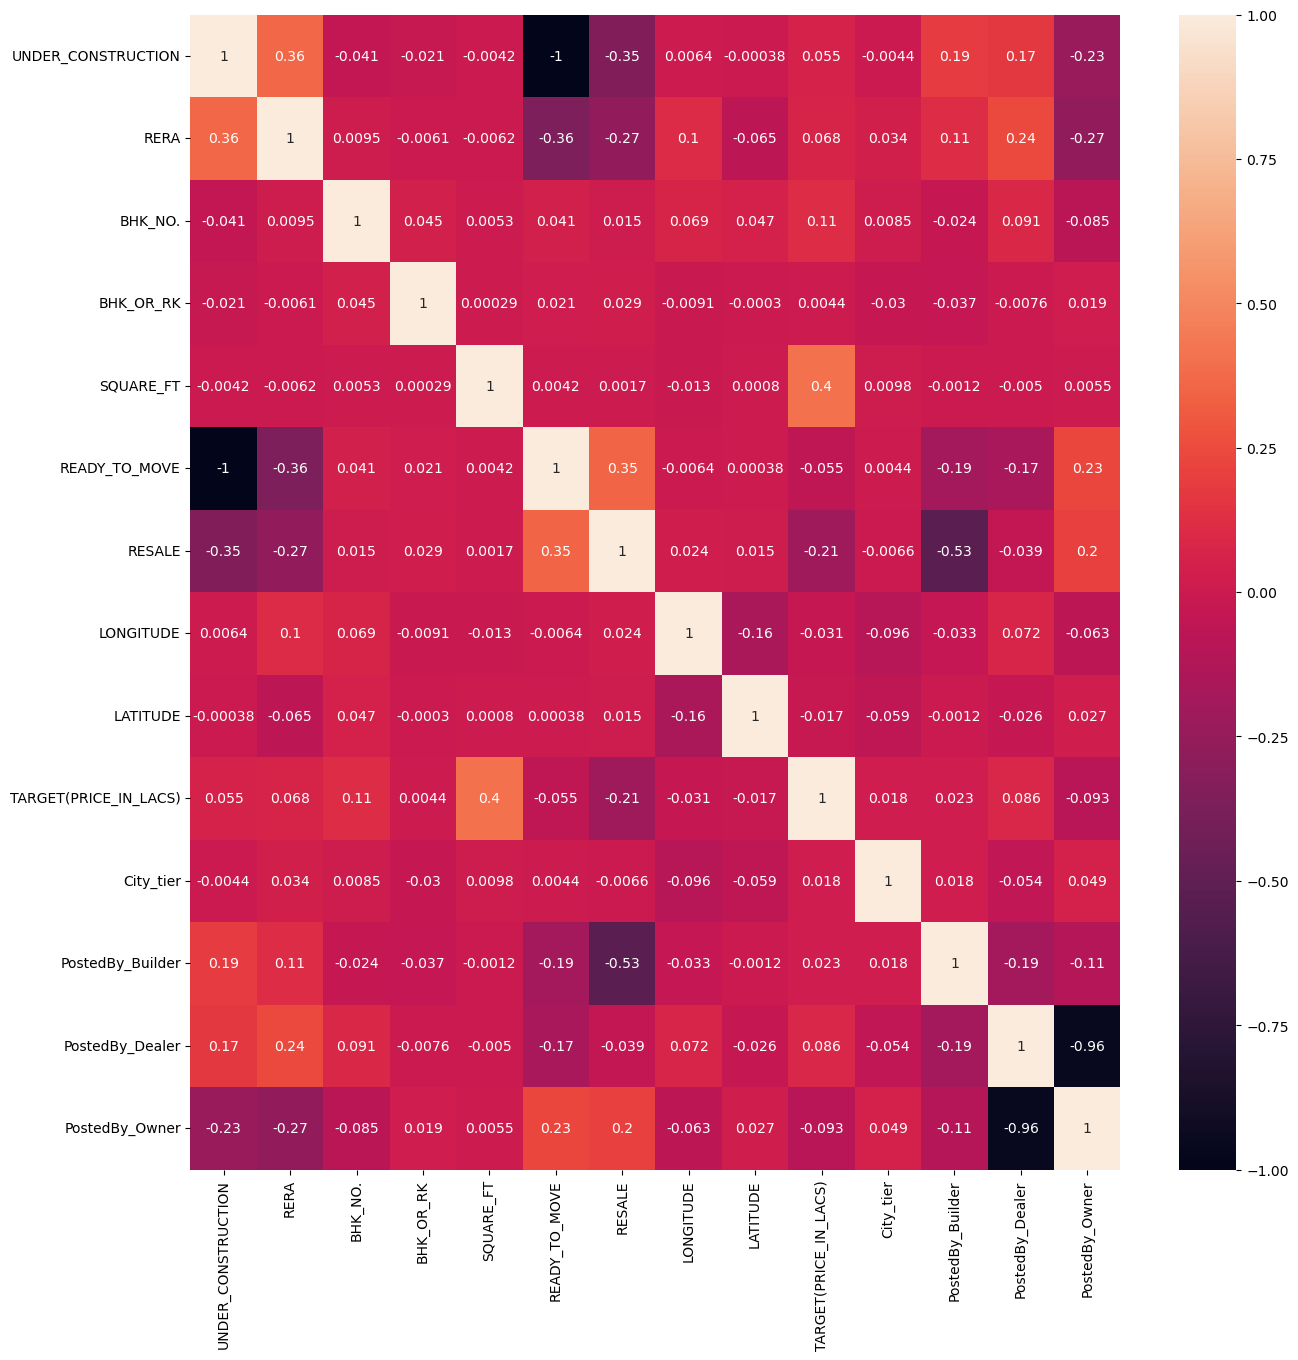

In [30]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

As we can see, none of the columns have a linear relationship with the Dependant variable (TARGET(PRICE_IN_LACS)). Hence, the linear regression model performed so poorly.

## 2. Decision Tree

In [125]:
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor()

### Model Evaluation

In [126]:
# Testing Data Evaluation

ypredtest = dt_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtest) - 1) / (len(xtest) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0012947777589643714
Mean_squared_error:  0.00011385350172119581
R_squared:  0.797246314960109
Adjusted_R2:  0.7968876542027925


In [127]:
# Training Data Evaluation

ypredtrain = dt_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtrain) - 1) / (len(xtrain) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0001274302399842529
Mean_squared_error:  5.654597364719704e-07
R_squared:  0.9987490335705298
Adjusted_R2:  0.9987482968411838


Decision Tree Model before hyperparameter tuning: 

Training Accuracy = 99% , Testing Accuracy = 79%

As the model is overfitting, lets perform hyperparameter tuning

### Hyperparameter Tuning 

In [128]:
dt_model = DecisionTreeRegressor()

hyp_grid = {"criterion" : ["squared_error", "absolute_error"], 
            "max_depth" : np.arange(3,20),
            "min_samples_split" : np.arange(2,15) ,
            "min_samples_leaf" : np.arange(1,15)}

rscv = RandomizedSearchCV(dt_model, hyp_grid, cv=5)
rscv.fit(xtrain,ytrain)
rscv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_split=7)

In [129]:
dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=11, min_samples_split=7)
dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_split=7)

In [130]:
# Testing Data Evaluation

ypredtest = dt_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtest) - 1) / (len(xtest) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0013781987275082966
Mean_squared_error:  0.00011517141035281753
R_squared:  0.7948993442691106
Adjusted_R2:  0.7945365318423177


In [131]:
# Training Data Evaluation

ypredtrain = dt_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtrain) - 1) / (len(xtrain) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0009390581544717026
Mean_squared_error:  8.0437842728078e-06
R_squared:  0.9822047381234167
Adjusted_R2:  0.9821942579927473


Decision Tree Model after hyperparameter tuning: 

Training Accuracy = 98% , Testing Accuracy = 79%

As we can see, Even after Hyperparameter tuning, the overfitting has not reduced.

Lets try random forest to see if we get any better results

# 3. Random Forest

In [135]:
rf_model = RandomForestRegressor(random_state=20)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=20)

In [136]:
# Testing Data Evaluation

ypredtest = rf_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtest) - 1) / (len(xtest) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0011284525986729112
Mean_squared_error:  0.00010768414437058539
R_squared:  0.8082328890948889
Adjusted_R2:  0.8078936630176312


In [137]:
# Training Data Evaluation

ypredtrain = rf_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtrain) - 1) / (len(xtrain) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.00045191593776106644
Mean_squared_error:  5.414931980231203e-06
R_squared:  0.9880205473737221
Adjusted_R2:  0.9880134923368398


Random Forest Model before hyperparameter tuning: 

Training Accuracy = 98% , Testing Accuracy = 80%

As the model is overfitting, lets perform hyperparameter tuning

### Hyperparameter Tuning


In [140]:
rf_model = RandomForestRegressor()

hyp_grid = {"max_features" : ["sqrt","log2"],
            "n_estimators" : np.arange(1,100,10),
            "criterion" : ["squared_error", "absolute_error"], 
            "max_depth" : np.arange(3,20),
            "min_samples_split" : np.arange(2,15) ,
            "min_samples_leaf" : np.arange(1,15)}

rscv = RandomizedSearchCV(rf_model,hyp_grid,cv=5)
rscv.fit(xtrain,ytrain)
rscv.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=61)

In [141]:
rf_model = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                                 min_samples_split=8, n_estimators=61)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=61)

In [142]:
# Testing Data Evaluation

ypredtest = rf_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytest,ypredtest)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtest) - 1) / (len(xtest) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.001492805126527422
Mean_squared_error:  9.807143408687897e-05
R_squared:  0.8253514880292903
Adjusted_R2:  0.8250425438660546


In [143]:
# Training Data Evaluation

ypredtrain = rf_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print("Mean_absolute_error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print("Mean_squared_error: ", Mean_squared_error)

R_squared = r2_score(ytrain,ypredtrain)
print("R_squared: ", R_squared)

Adjusted_R2 = 1 - ((1 - R_squared)*(len(xtrain) - 1) / (len(xtrain) - len(x.columns) - 1))
print("Adjusted_R2: ", Adjusted_R2)

Mean_absolute_error:  0.0011774576332739847
Mean_squared_error:  5.346269751667665e-05
R_squared:  0.8817244880430227
Adjusted_R2:  0.881654832264485


Random Forest Model after hyperparameter tuning: 

Training Accuracy = 88% , Testing Accuracy = 82%

Random Forest model has the least amount of variance and highest testing accuracy. 

Therefore, Random Forest is the best model for this data.